In [2]:
import os, sys
import matplotlib
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr

import glob
import shutil




%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append(r"/ssd_scratch/scripts/soledge")

In [4]:
from plot1d_on_rad_mesh_cut import *

ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

In [5]:
%matplotlib tk

ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

In [15]:

db = CaseDB(
    case_dir = r"/ssd_scratch/cases/step",
    grid_dir = r"/ssd_scratch/cases/step"
    )

toload = [
    dict(name="step1", id="step1", unnormalise_geom = True),
    dict(name="no_ar", id="sta2-ar_0", unnormalise_geom = True),
    # dict(name="beuler", id="sta3-beuler", unnormalise_geom = True),
    dict(name="hires", id="sta4-ar0_hires_hirtol", unnormalise_geom = True),
]

casestore = dict()

for case in toload:
    casestore[case["name"]] = Load.case_1D(db.casepaths[case["id"]])


In [4]:
%matplotlib widget

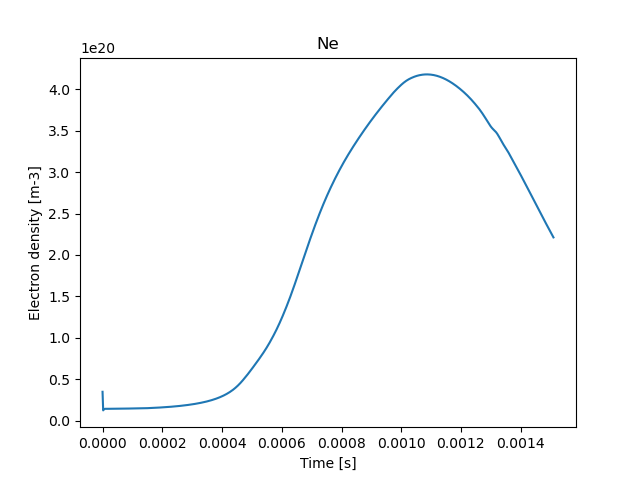

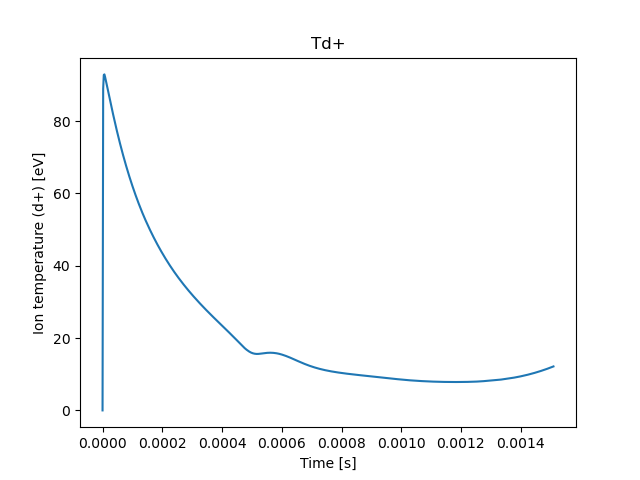

In [17]:


ds = casestore["hires"].ds.isel(pos=slice(1,-1))

for param in ["Ne", "Td+"]:
    fig, ax = plt.subplots()
    ds[param].isel(pos=-1).plot()
    ax.set_title(param)


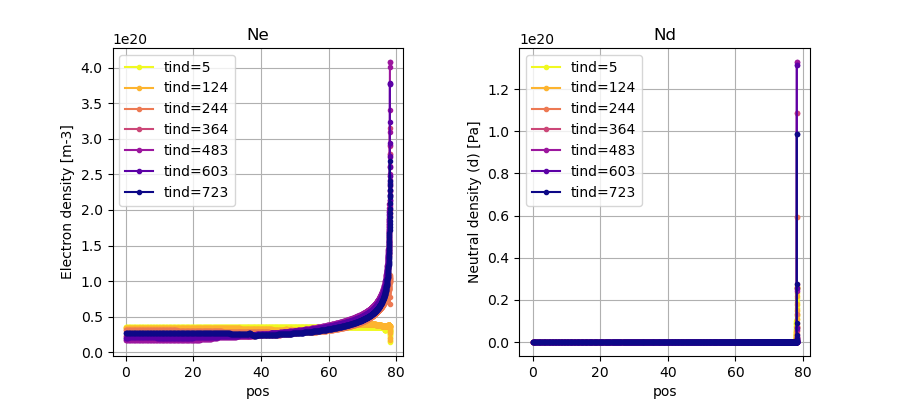

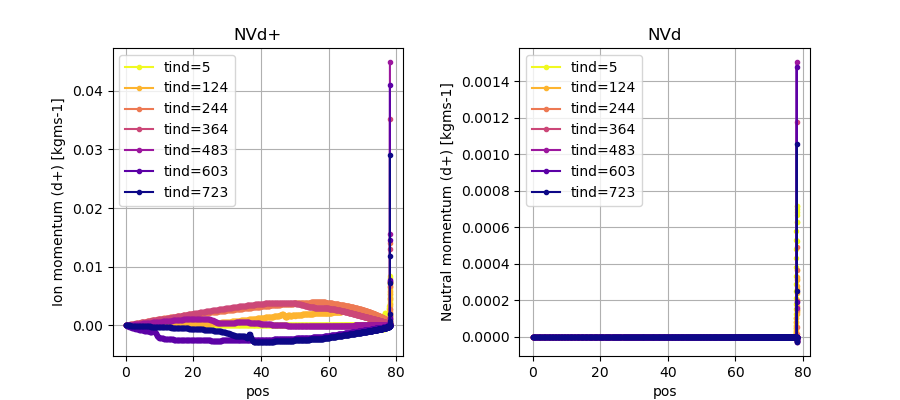

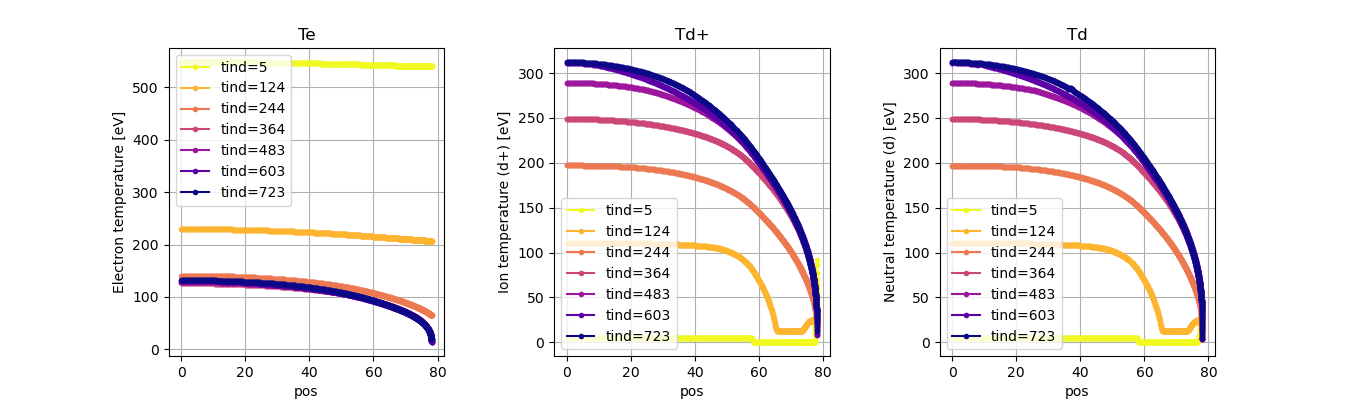

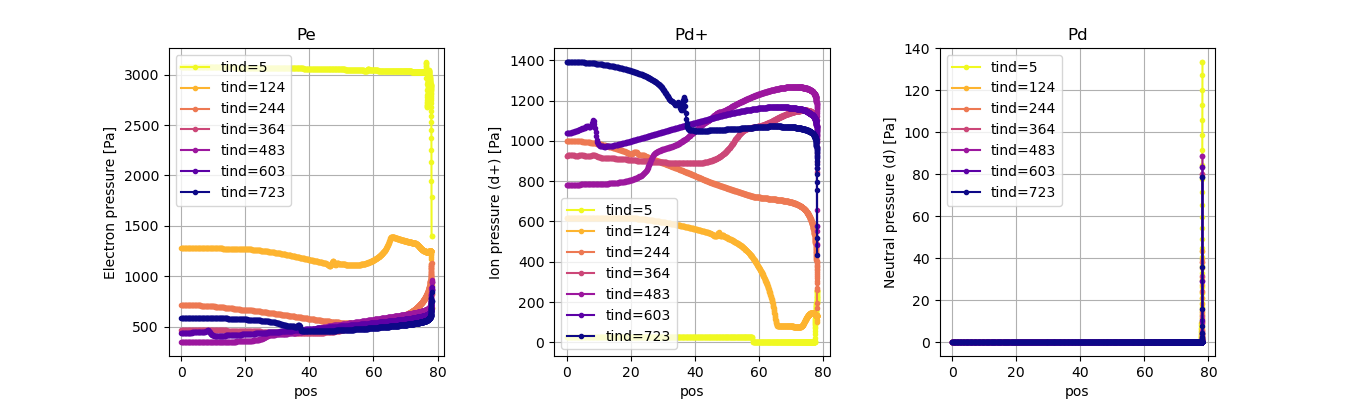

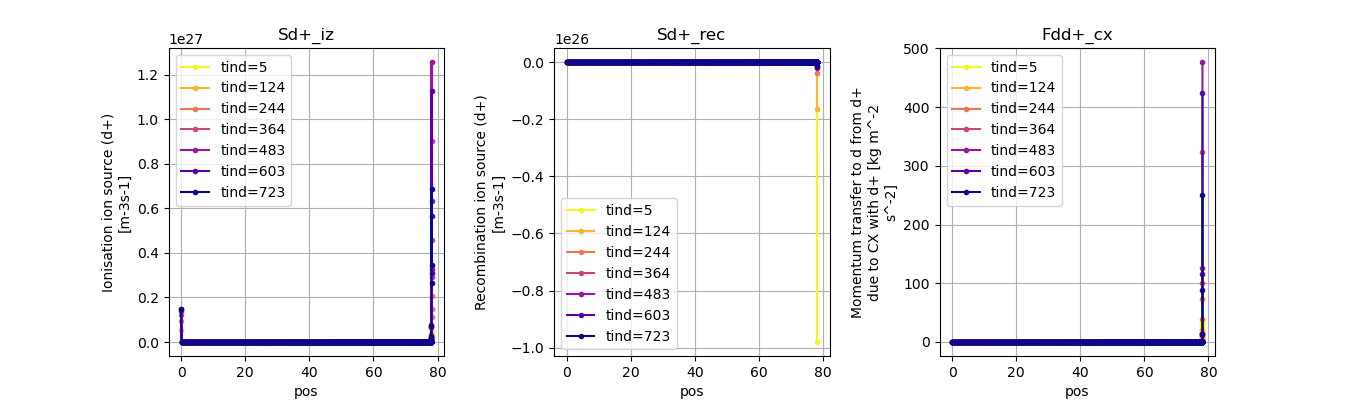

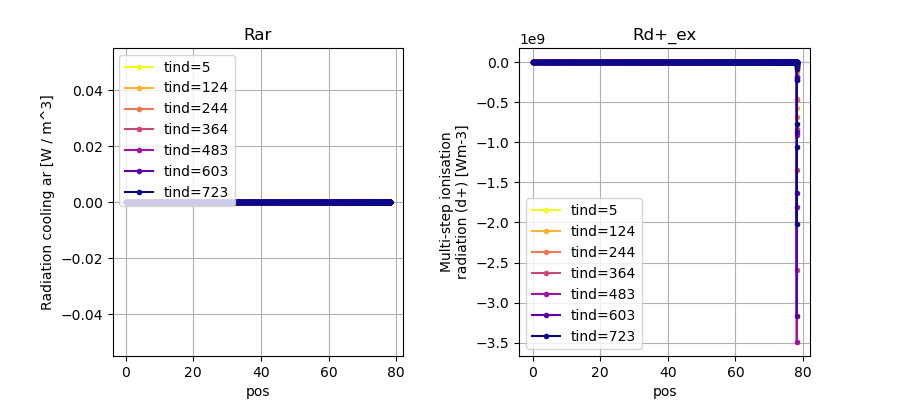

In [21]:
plt.close("all")
ds = casestore["hires"].ds.isel(pos=slice(1,-1))



def plot(list_params):
    fig, axes = plt.subplots(1, len(list_params), figsize=(len(list_params)*4.5, 4), dpi = 100)
    fig.subplots_adjust(wspace = 0.4)
    # times = [-6, -5, -4, -3, -2, -1]
    times = np.linspace(5, len(ds.coords["t"])-1, 7, dtype=int)
    colors = make_cmap("plasma", len(times))[::-1]
    for j, param in enumerate(list_params):
        for i, tind in enumerate(times):
            data = ds[param].isel(t=tind)
            # data = data.sel(pos=slice(77,None))
            data.plot(ax = axes[j], x = "pos", marker = "o", label = f"tind={tind}", color = colors[i], ms = 3)
            
        axes[j].grid()
        axes[j].set_title(param)
        axes[j].legend()
        
plot(["Ne", "Nd"])
plot(["NVd+", "NVd"])
plot(["Te", "Td+", "Td"])
plot(["Pe", "Pd+", "Pd"])
plot(["Sd+_iz", "Sd+_rec", "Fdd+_cx"])
plot(["Rar", "Rd+_ex"])

In [ ]:
ds = casestore["step1"].ds.isel(pos=slice(1,-1)).isel(t=slice(-10,0))
ds = ds.sel(pos = slice(77,None))

fig, ax = plt.subplots(dpi = 100)
# ds["NVd"].plot(ax = ax, x = "pos", marker = "o")

anim = xbout.plotting.animate.animate_line(ds["Ne"],  ax = ax,  marker = "o")
ax.grid()


In [52]:
%matplotlib widget

In [37]:
ds["Te"].values

array([34.69235015, 32.62186792, 30.47387547, 28.25374548, 25.87843574,
       23.45888908, 21.10375404, 14.72694558,  9.04325809,  5.55312142,
        0.        ])

In [33]:
ds.dims

Frozen({'pos': 11, 'y': 104})

In [38]:
self = casestore["step1"]

for var_name in self.ds.data_vars:
    var = self.ds[var_name]
    if "pos" in var.dims:
        var[{"pos":-2}] = (var[{"pos":-3}] + var[{"pos":-2}])/2
        var[{"pos":1}] = (var[{"pos":1}] + var[{"pos":2}])/2


In [41]:
self.ds["Te"].isel(t=-1).values

array([  0.        , 128.60871083, 128.60871083, 128.577988  ,
       128.51201483, 128.41417974, 128.2868572 , 128.13103613,
       127.94770632, 127.73779228, 127.50201354, 127.24092176,
       126.95495168, 126.64447383, 126.30984559, 125.95144315,
       125.56966438, 125.1649026 , 124.73750323, 124.28772522,
       123.81572888, 123.32159843, 122.80538849, 122.26717008,
       121.7070519 , 121.1251666 , 120.5216314 , 119.89650429,
       119.24975374, 118.58124248, 117.89071121, 117.17775065,
       116.44177973, 115.68208974, 114.89802298, 114.08931044,
       113.25637336, 112.40006786, 111.52104398, 110.61939201,
       109.69459342, 108.74548015, 107.77023221, 106.76658426,
       105.73423704, 104.67250119, 103.58343108, 102.46535467,
       101.31851445, 100.14068338,  98.93071503,  97.6874456 ,
        96.4085847 ,  95.1068739 ,  93.78968156,  92.46078588,
        91.14433693,  89.83169657,  88.51399799,  87.19131695,
        85.86499864,  84.53436685,  83.19752562,  81.85

In [23]:
casestore["step1"].guard_replace()

Exception: Guards already replaced!

In [40]:
%matplotlib inline

In [2]:
import pandas as pd
df = pd.DataFrame()
df["test"] = "a"

print(df)

Empty DataFrame
Columns: [test]
Index: []


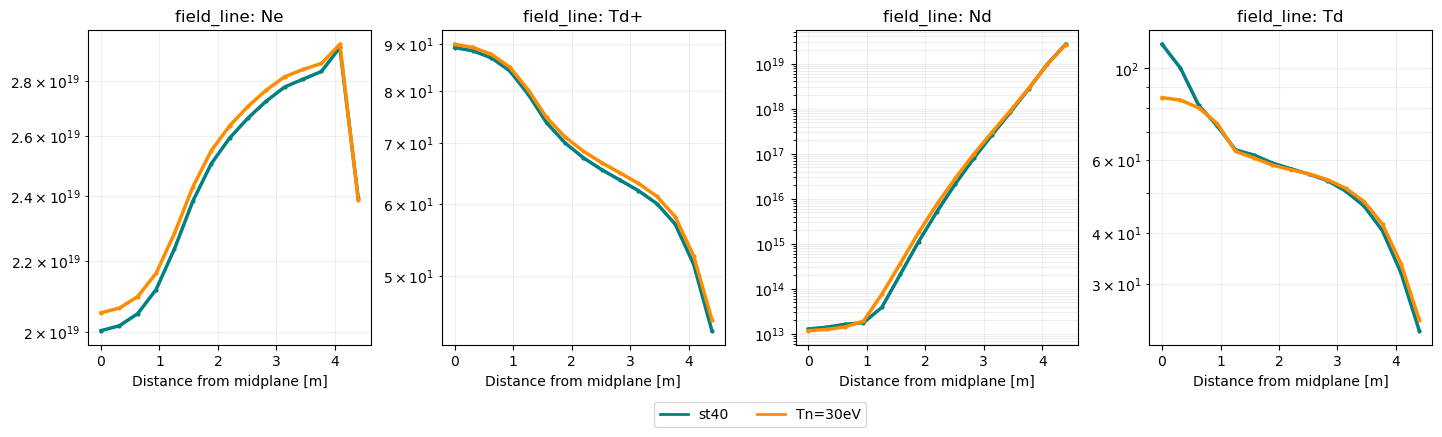

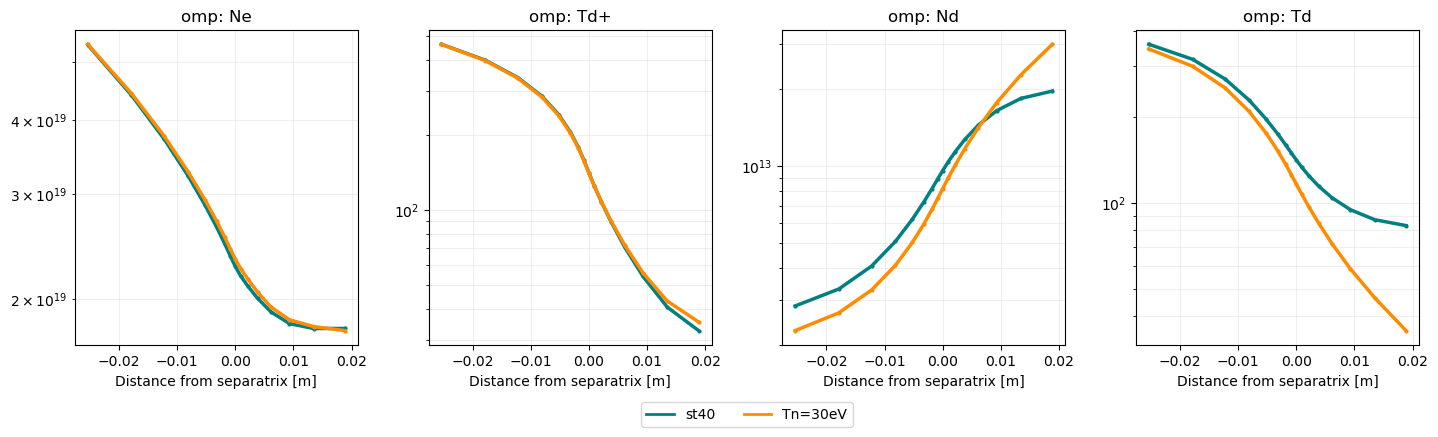

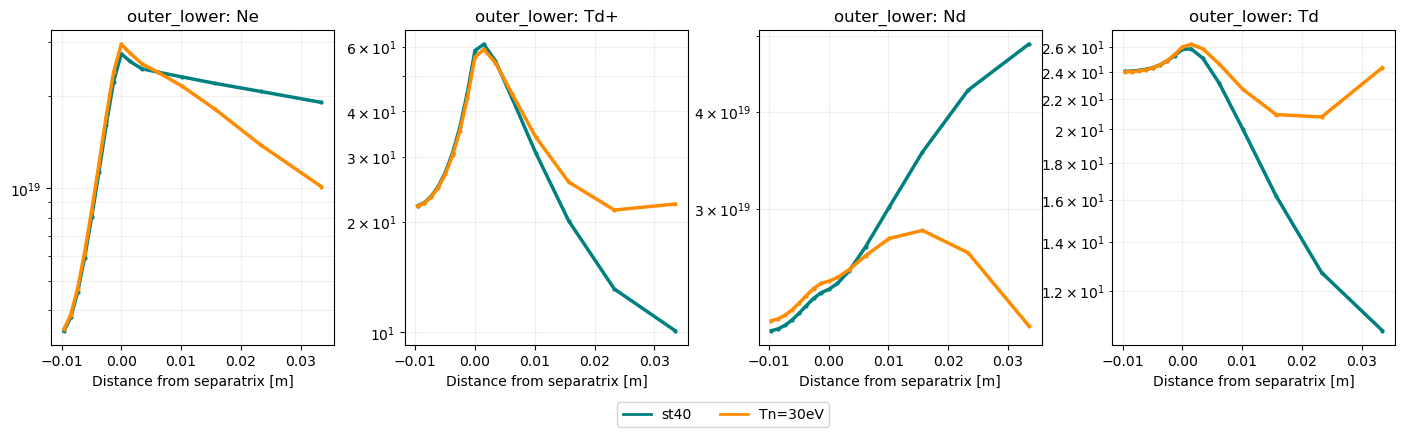

In [3]:
lineplot(
    {
        # "dirichlet" : casestore["dirichlet"].ds,
        "st40" : casestore["st40_process"].ds.isel(x = slice(2,-2)),
        "Tn=30eV" : casestore["st40_tn_bc"].ds.isel(x = slice(2,-2)),
        # "No neutrals" : casestore["no_neutrals"].ds.isel(x = slice(2,-2)),
        # "No par diff" : casestore["no_par_diff"].ds.isel(x= slice(2,-2)),
        # "No upwind" : casestore["no_upwind"].ds.isel(x= slice(2,-2))
        # "Core source" : casestore["src"].ds.isel(x = slice(2,-2)),
        # "Core source, scratch" : casestore["src_fromscratch"].ds.isel(x=slice(2,-2))
        },
    # params = ["Ne", "Td+", "Pd+", "NVd+"],
    params = ["Ne", "Td+", "Nd", "Td"],
    regions = ["field_line", "omp", "outer_lower"],
    # regions = ["omp"],
    scale = "log",
    dpi = 100
)

st40_process


/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


st40_tn_bc


/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


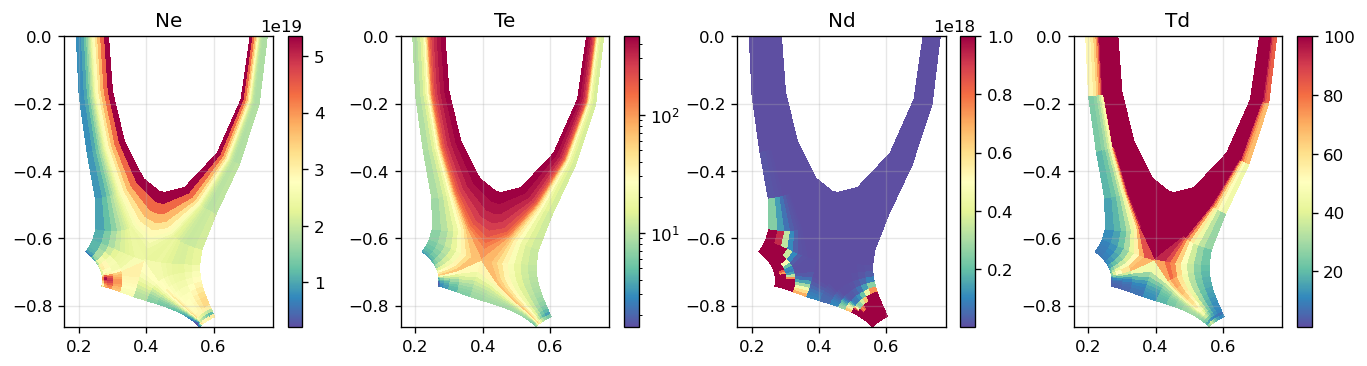

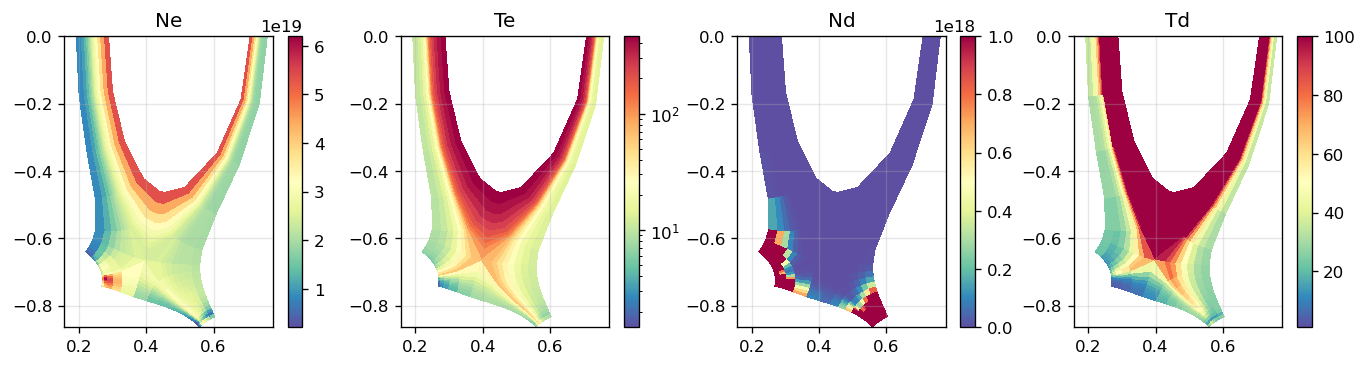

In [5]:
plt.close("all")
for casename in ["st40_process", "st40_tn_bc"]:
   print(casename)
   self = Monitor2D(casestore[casename], mode = "polygon", windows = [["Ne", "Te", "Nd", "Td"]], 
                  settings = {
                     "all":{"view":"lower_divertor", "dpi": 120, "clean_guards":True},
                     "Ne":{"vmin":None, "vmax":None},
                     "Te":{"log":True, "vmin":None, "vmax":None},
                     "Td+":{"log":True, "vmin":None, "vmax":None},
                     "Nd":{"log":False, "vmax":1e18},
                     "Td":{"log":False, "vmin":1, "vmax":100}
                     })

In [77]:
for name in casestore:
    casestore[name].ds = calculate_radial_fluxes(casestore[name].ds)
    casestore[name].ds = calculate_target_fluxes(casestore[name].ds)
    casestore[name].ds = calculate_heat_balance(casestore[name].ds)
    casestore[name].ds = calculate_particle_balance(casestore[name].ds)

In [18]:
name = "st40_process"
ds = casestore[name].ds
ds = calculate_radial_fluxes(ds, force_neumann = False)
ds = calculate_target_fluxes(ds)
ds = calculate_heat_balance(ds)
ds = calculate_particle_balance(ds)

# plot_selection(ds, ds.hermesm.select_region("all_noguards"))

---------------------------------------
PARTICLE BALANCE
---------------------------------------
Domain volume: 1.607e+00 [m3]
Particle imbalance: -3.737e+19 [s-1]
Particle imbalance as frac of core + source: -0.65%
---------------------------------------
Total fluxes in [s-1]:


,d+,d,total
source,0.00e+00,0.00e+00,0.00e+00
core,5.79e+21,0.00e+00,5.79e+21
sol,0.00e+00,0.00e+00,0.00e+00
pfr,0.00e+00,0.00e+00,0.00e+00
targets,-1.16e+23,1.11e+23,-5.82e+21
iz,1.11e+23,-1.11e+23,0.00e+00
rec,-1.32e+19,1.32e+19,0.00e+00


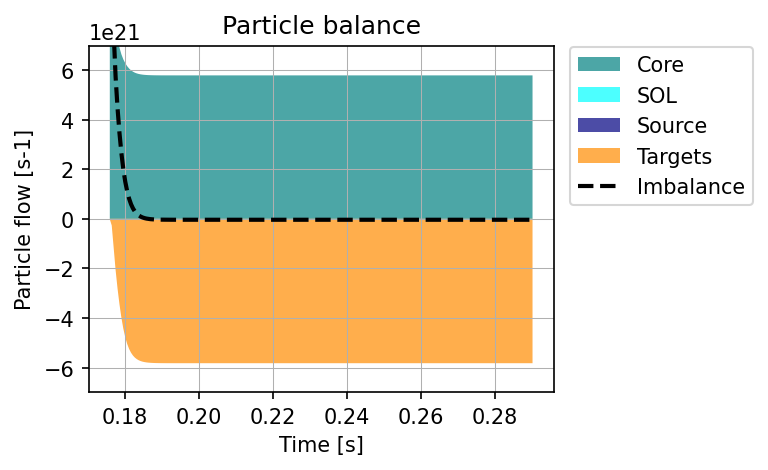

In [19]:
show_particle_balance_table(ds)
plot_particle_balance(ds)

---------------------------------------
HEAT BALANCE
---------------------------------------
Domain volume: 1.607e+00 [m3]
Power imbalance: -0.226 [MW]
Power imbalance as frac of core + source: -6.07%
---------------------------------------
Total fluxes in [MW]:


,d,e,d+,total
source,0.00,0.00,0.00,0.00
core,0.00,1.75,1.97,3.72
sol,0.00,0.00,0.00,0.00
pfr,0.00,0.00,-0.00,-0.00
targets,0.00,-1.54,-1.95,-3.49
rad_ex,nan,-0.46,nan,-0.46
rad_rec,nan,-0.00,nan,-0.00


<class 'list'>
<class 'list'>


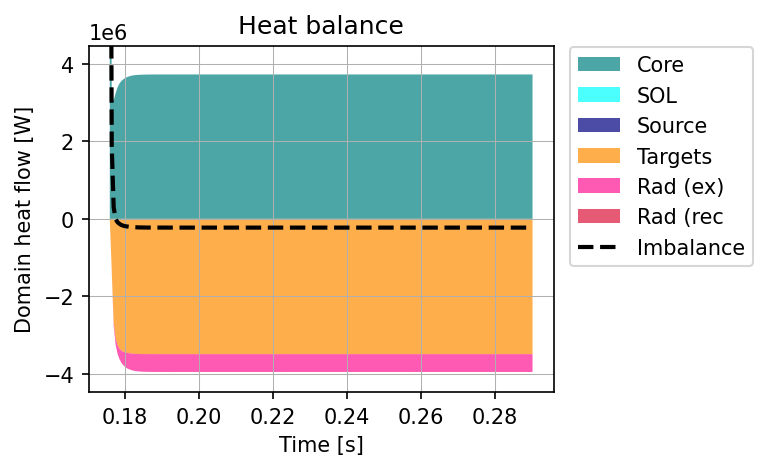

In [21]:
import warnings
warnings.simplefilter('ignore', RuntimeWarning)
show_heat_balance_table(ds)
plot_heat_balance(ds)

In [ ]:
impose_fields(
    source = r"/ssd_scratch/hcases/g3b1-lores_newhypno.nc",
    destination = r"/ssd_scratch/hcases/g3b1f2-mbtest.nc",
    Ni_src_core = 8.53e21,
    Pi_src_core = 1.33e6 * 2/3,
    Pe_src_core = 1.28e6 * 2/3,
    
)

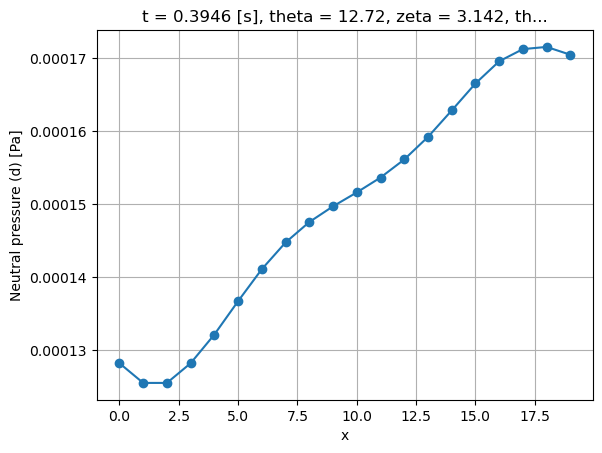

In [26]:
ds = casestore["st40_tn_bc"].ds.isel(t=-1)
omp = ds.hermesm.select_region("outer_midplane_a")

fig, ax = plt.subplots(dpi=100)
# omp["pf_perp_diff_R_d"].plot(ax = ax, marker = "o")
# (omp["Nd"]*omp["Dnnd"]).plot(ax = ax, marker = "o")
(omp["Pd"]).plot(ax = ax, marker = "o")
ax.grid()

/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


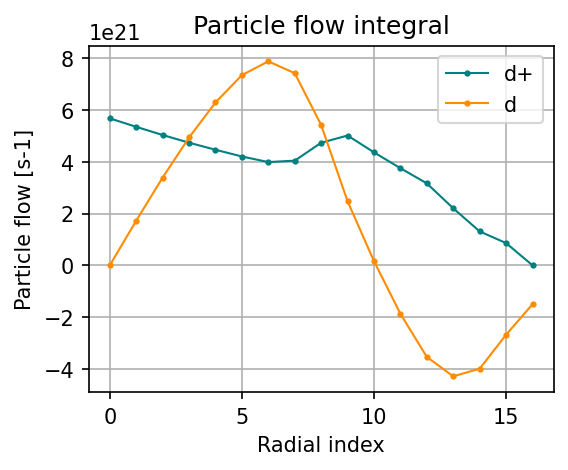

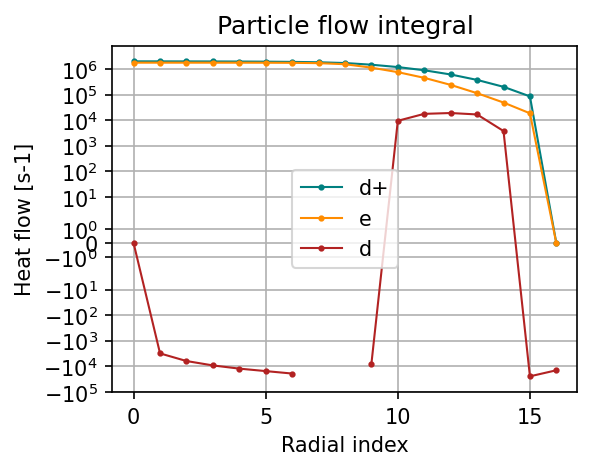

In [9]:
# plot_perp_particle_fluxes(casestore["no_neutrals"].ds.isel(t=-1))
plot_perp_particle_fluxes(casestore["st40_tn_bc"].ds.isel(t=-1))
plot_perp_heat_fluxes(casestore["st40_tn_bc"].ds.isel(t=-1))

In [75]:
%matplotlib widget

In [ ]:
plt.close("all")
v = viewer_2d(
    "hf_perp_tot_L_d",
    cases = {
        "st40_process" : {"code":"hermes", "ds":casestore["st40_process"].ds}
    },
    vmin = 1,
)

In [ ]:
plt.close("all")
self = Monitor2D(casestore["compasslike"], mode = "polygon", windows = [["Td", "Nd", "pf_perp_diff_d"]], 
                 settings = {
                    "all":{"view":None, "dpi": 120, "clean_guards":True},
                    "Ne":{"vmin":None, "vmax":None},
                    "Te":{"log":True, "vmin":10, "vmax":100},
                    "Td+":{"log":True, "vmin":10, "vmax":100},
                    "Nd":{"log":False, "vmax":1e18},
                    })

# Plot OMP profiles

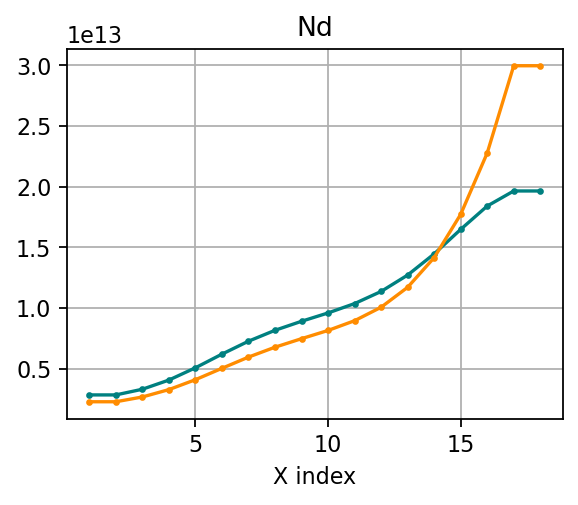

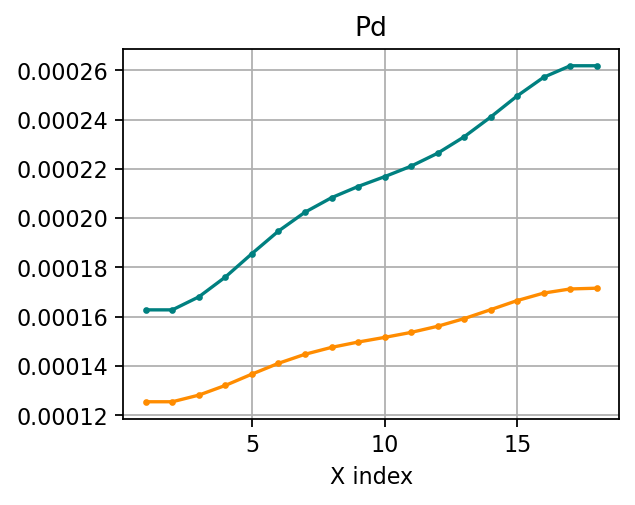

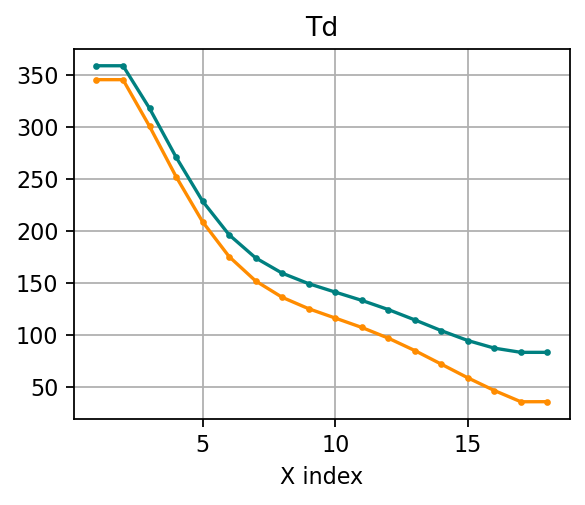

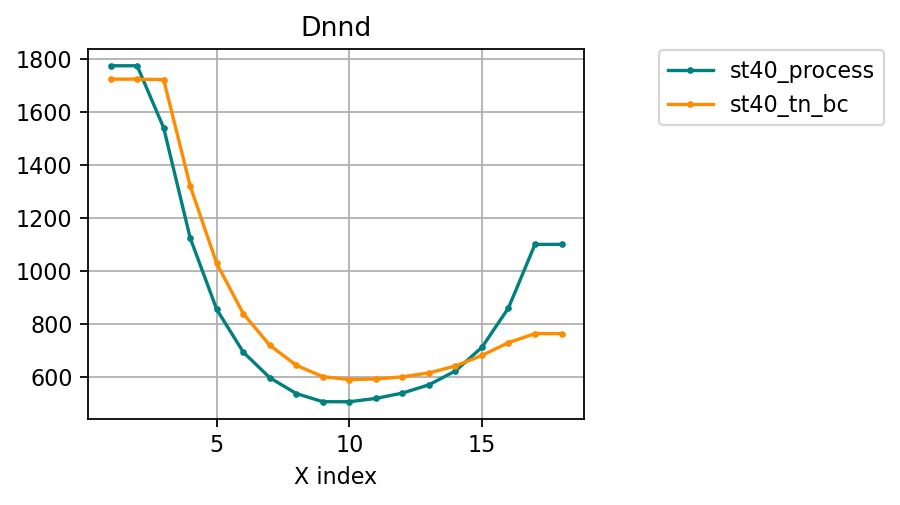

In [8]:
toplot = ["st40_process", "st40_tn_bc"]
lslist = ["-", "--", ":"]
mlist = ["o", "v", "x"]
for param in ["Nd", "Pd", "Td", "Dnnd"]:
    
    fig, ax = plt.subplots(figsize=(4,3), dpi = 160)
    for i, casename in enumerate(toplot):
        if casename != "allneumann":
            ds = casestore[casename].ds.isel(x=slice(1,-1))
            # d = ds.isel(t=-1, x=slice(2,-2)).sum("theta")
            d = ds.isel(t=-1).hermesm.select_region("outer_midplane_a")

            d[param].plot(ax = ax, marker = "o", ms = 2, c = ds.metadata["colors"][i], label = casename)

            # ax2 = ax.twinx()
            # ax2.plot(d.coords["x"], d["Sd+_iz"],  marker = "o", label = "iz (RHS)", ms = 0, c = "grey", ls = "--")

    ax.set_title(param)
    ax.set_xlabel("X index")
    ax.set_ylabel("")
    ax.grid()
fig.legend(loc = "upper left", bbox_to_anchor=(1.0, 0.9))

# Post-processing

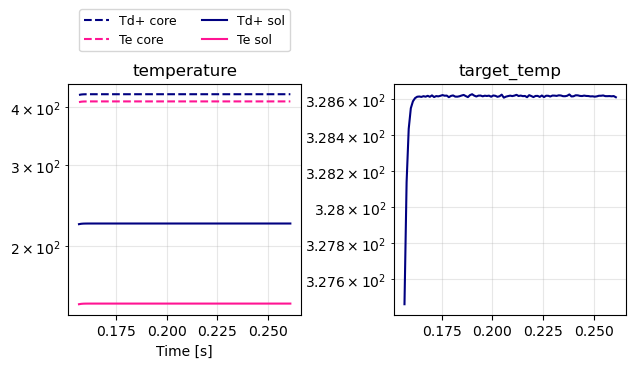

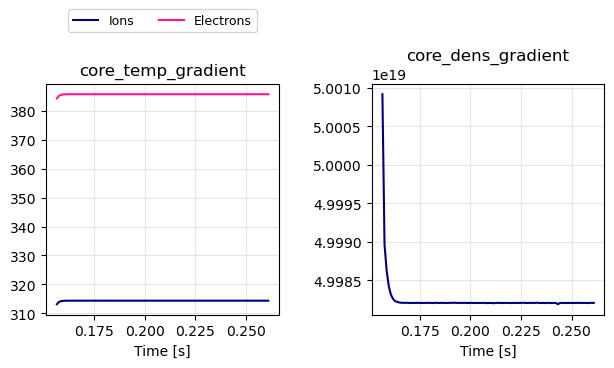

In [66]:
Monitor(casestore["src"], [
    # ["density", "temperature","target_temp"],
    ["temperature", "target_temp"],
    # ["recombination", "ionisation", "radiation"],
    ["core_temp_gradient", "core_dens_gradient"],
#    ["cvode_order", "ncalls_per_timestep", "cvode_evals", "cvode_fails"]], 
                ],
                settings = {"all":{"dpi":200}})
# Monitor(case, [["recombination", "ionisation", "radiation"]])

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': 'lower_divertor', 'dpi': 100}


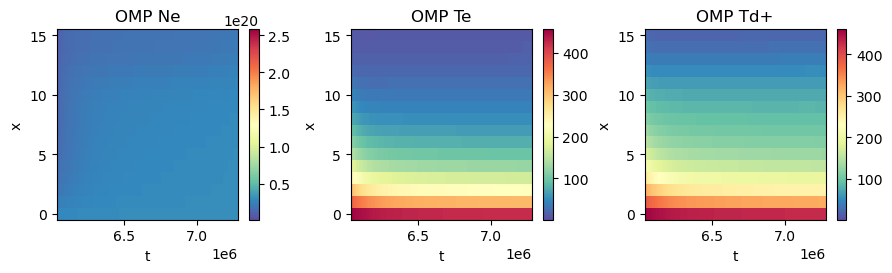

In [5]:
self = Monitor2D(caseng, mode = "omp_history", windows = [["Ne", "Te", "Td+"]], 
                 settings = {
                    "all":{"view":"lower_divertor", "dpi": 100},
                    "Ne":{"vmax":None},
                    "Te":{"vmin":None, "vmax":None},
                    "Td+":{"vmin":None, "vmax":None},
                    })

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': 'None', 'dpi': 150}


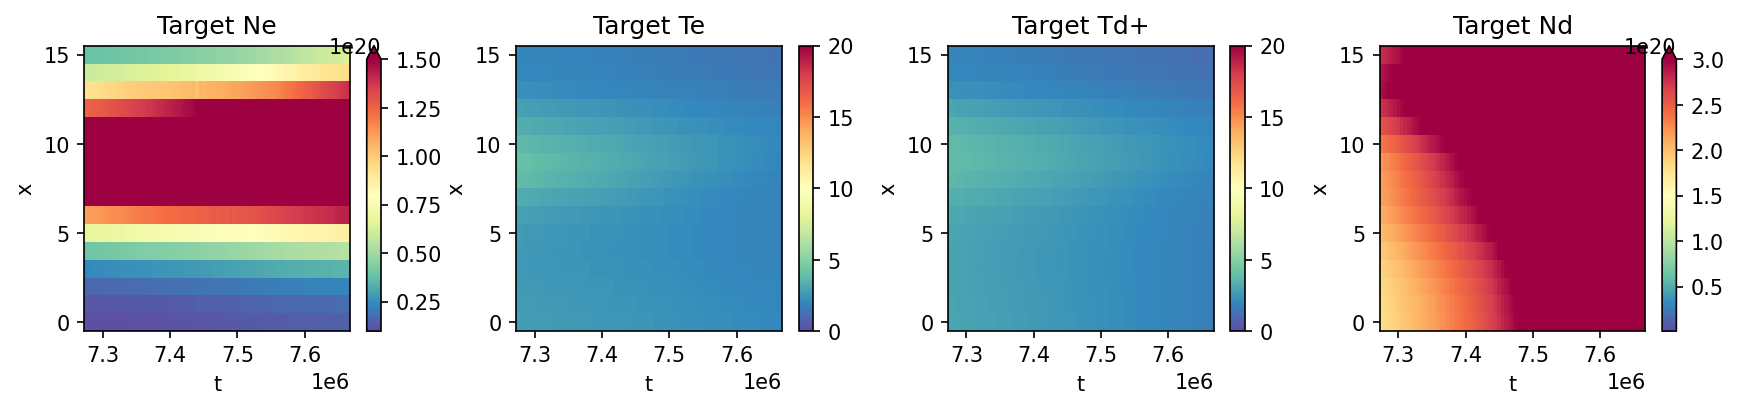

In [5]:
self = Monitor2D(caseng, mode = "target_history", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                    "all":{"view":"None", "dpi": 150},
                    "Ne":{"vmax":15e19},
                    "Te":{"vmin":0, "vmax":20},
                    "Td+":{"vmin":0, "vmax":20},
                    "Nd":{"vmin":1e18, "vmax":3e20}
                    })

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 100}


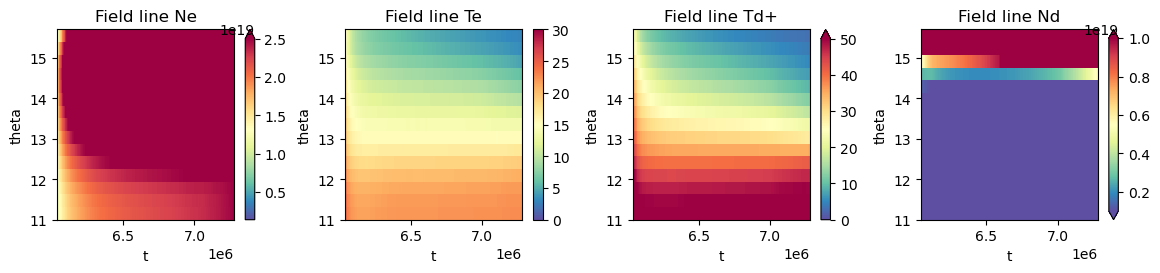

In [7]:
self = Monitor2D(caseng, mode = "field_line_history", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                  #   "all":{"view":"lower_divertor", "dpi": 100},
                    "Ne":{"vmax":2.5e19},
                    "Te":{"vmin":0, "vmax":30},
                    "Td+":{"vmin":0, "vmax":50},
                    "Nd":{"vmin":1e18, "vmax":1e19}
                    })

In [11]:
caseng.unnormalise(unnormalise_geom=False)

--> dx, dy and J will not be unnormalised


{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 100}


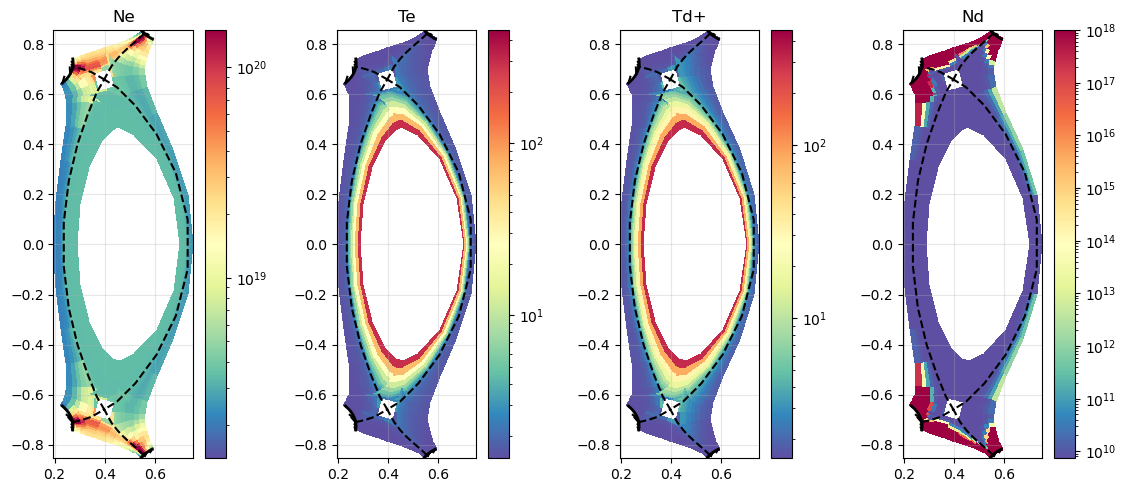

In [16]:
self = Monitor2D(caseng, mode = "pcolor", windows = [["Ne", "Te", "Td+", "Nd"]], 
                 settings = {
                    "all":{"view":None, "dpi": 100},
                    "Sd_src":{"log":False},
                    "Ne":{"vmin":None, "vmax":15e19},
                    "Te":{"log":True, "vmin":None, "vmax":None},
                    "Td+":{"log":True, "vmin":None, "vmax":None},
                    "Nd":{"log":True, "vmin":None, "vmax":1e18}
                    })